https://www.kdnuggets.com/2016/04/regression-correlation-military-tutorial.html

https://chrisalbon.com/machine_learning/basics/make_simulated_data_for_regression/

In [122]:
# Generate fetures, outputs, and true coefficient of 100 samples,
features, output, coef = make_regression(n_samples = 100,
                                         # three features
                                         n_features = 4,
                                         # where only two features are useful,
                                         n_informative = 2,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.0 standard deviation of the guassian noise
                                         noise = 0.05,
                                         # show the true coefficient used to generated the data
                                         coef = True)

In [123]:
# make_regression?

In [124]:
type(features)

numpy.ndarray

In [125]:
features.shape

(100, 4)

In [126]:
pd.DataFrame(features)

,0,1,2,3
0,0.090890,-0.834129,-0.395749,-0.157402
1,-0.058114,0.845277,-0.210012,1.674146
2,0.698483,-0.646179,1.305023,1.084893
3,0.037149,-0.454120,-0.400541,-1.009416
4,-0.183731,0.500764,-1.025389,-0.250839
...,...,...,...,...
95,0.547512,0.443287,-0.105424,-0.455539
96,0.699326,0.731850,0.487942,0.051156
97,1.253975,0.467335,-2.522359,1.308021
98,-0.336087,-1.598526,-1.905243,-0.656353


In [127]:
df_x = pd.DataFrame(features, columns=['col1', 'col2', 'col3', 'col4'])
df_x.head()

,col1,col2,col3,col4
0,0.090890,-0.834129,-0.395749,-0.157402
1,-0.058114,0.845277,-0.210012,1.674146
2,0.698483,-0.646179,1.305023,1.084893
3,0.037149,-0.454120,-0.400541,-1.009416
4,-0.183731,0.500764,-1.025389,-0.250839


In [128]:
df_y = pd.DataFrame(output, columns=['target'])
df_y.head()

,target
0,-7.327345
1,80.317248
2,53.784497
3,-48.348069
4,-12.473097


In [129]:
df = pd.merge(df_x,df_y, how="outer", left_index=True, right_index=True)

In [130]:
df.head()

,col1,col2,col3,col4,target
0,0.090890,-0.834129,-0.395749,-0.157402,-7.327345
1,-0.058114,0.845277,-0.210012,1.674146,80.317248
2,0.698483,-0.646179,1.305023,1.084893,53.784497
3,0.037149,-0.454120,-0.400541,-1.009416,-48.348069
4,-0.183731,0.500764,-1.025389,-0.250839,-12.473097


In [131]:
df.describe()

,col1,col2,col3,col4,target
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.147619,-0.117122,-0.086679,0.022793,1.456798
std,1.005218,1.001476,0.975964,1.084677,52.429399
min,-2.525638,-2.335836,-2.522359,-2.123632,-99.254262
25%,-0.350613,-0.666895,-0.592433,-0.766886,-38.055922
50%,0.050321,-0.000856,-0.024889,-0.065154,-2.888290
75%,0.685460,0.503847,0.480195,0.813383,39.613695
max,2.937725,2.410667,2.607999,3.068879,146.699846


<AxesSubplot:xlabel='col1', ylabel='target'>

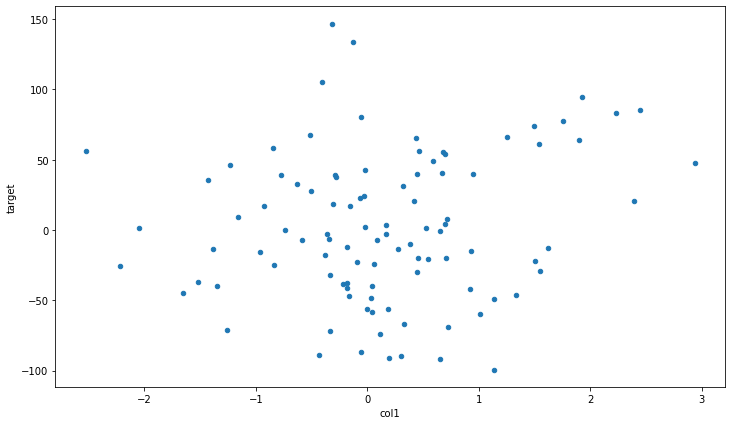

In [132]:
#  xlim=(0.0, 1.0), ylim=(1.8, -0.8), , alpha=plot_alpha   , s=2
df.plot.scatter('col1', 'target', figsize=(12, 7))

<AxesSubplot:xlabel='col2', ylabel='target'>

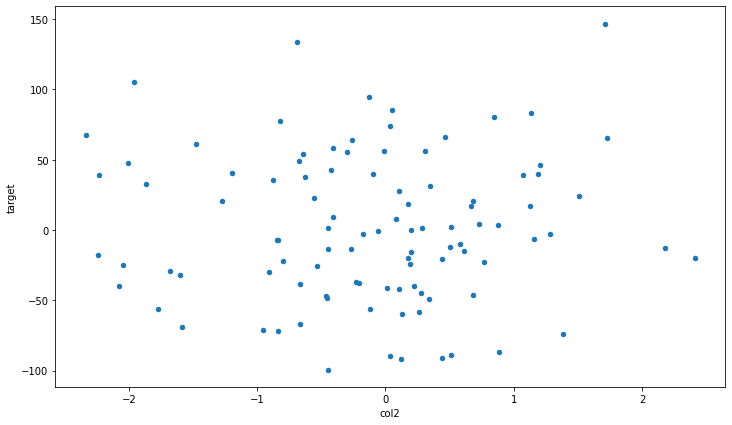

In [133]:
df.plot.scatter('col2', 'target', figsize=(12, 7))

<AxesSubplot:xlabel='col3', ylabel='target'>

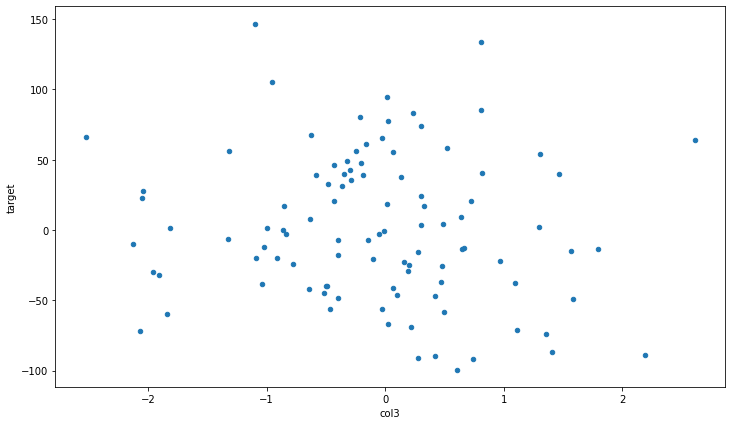

In [134]:
df.plot.scatter('col3', 'target', figsize=(12, 7))

<AxesSubplot:xlabel='col4', ylabel='target'>

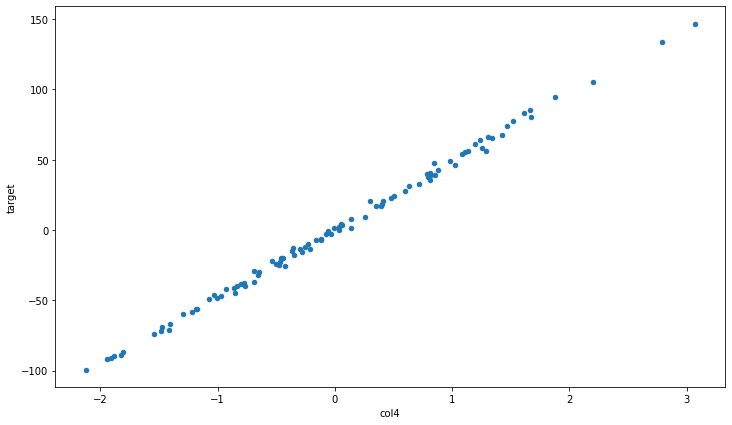

In [135]:
#  xlim=(0.0, 1.0), ylim=(1.8, -0.8), , alpha=plot_alpha   , s=2
df.plot.scatter('col4', 'target', figsize=(12, 7))

In [136]:
df.to_excel('038_회귀.xlsx' , index= False)

In [137]:
df = pd.read_excel('038_회귀.xlsx')

In [138]:
df.head()

,col1,col2,col3,col4,target
0,0.090890,-0.834129,-0.395749,-0.157402,-7.327345
1,-0.058114,0.845277,-0.210012,1.674146,80.317248
2,0.698483,-0.646179,1.305023,1.084893,53.784497
3,0.037149,-0.454120,-0.400541,-1.009416,-48.348069
4,-0.183731,0.500764,-1.025389,-0.250839,-12.473097


In [139]:
dataset = df.values

### target - 지휘관_잠재력 전처리

In [140]:
from sklearn.preprocessing import MinMaxScaler

In [141]:
arr_y = dataset[:,4:5] # 행, 열
arr_y[:4]

array([[ -7.32734467],
       [ 80.31724822],
       [ 53.78449705],
       [-48.34806852]])

In [142]:
scaler = MinMaxScaler(feature_range=(62, 100))

In [143]:
scaler.fit(arr_y)

MinMaxScaler(feature_range=(62, 100))

In [144]:
my_y = scaler.transform(arr_y)

In [145]:
my_y[:5]

array([[76.20274252],
       [89.74386432],
       [85.64454452],
       [69.86502561],
       [75.40772182]])

In [146]:
df2 = df.copy()

In [147]:
df2['target2'] = my_y

In [148]:
df2.head()

,col1,col2,col3,col4,target,target2
0,0.090890,-0.834129,-0.395749,-0.157402,-7.327345,76.202743
1,-0.058114,0.845277,-0.210012,1.674146,80.317248,89.743864
2,0.698483,-0.646179,1.305023,1.084893,53.784497,85.644545
3,0.037149,-0.454120,-0.400541,-1.009416,-48.348069,69.865026
4,-0.183731,0.500764,-1.025389,-0.250839,-12.473097,75.407722


In [30]:
import numpy as np

### IQ

In [149]:
arr_iq = dataset[:,3:4] # 행, 열
arr_iq[:4]

array([[-0.15740173],
       [ 1.67414589],
       [ 1.08489347],
       [-1.00941614]])

In [150]:
scaler = MinMaxScaler(feature_range=(85, 145))

In [151]:
scaler.fit(arr_iq)

MinMaxScaler(feature_range=(85, 145))

In [154]:
iq_f = scaler.transform(arr_iq)
iq_f[:5]

array([[107.71999283],
       [128.88371604],
       [122.074843  ],
       [ 97.87487773],
       [106.64030999]])

In [161]:
df2['IQ'] = iq_f + np.random.randint(-10,10,size=(100,1))

In [158]:
# df2['randint1'] = np.random.randint(-5,5,size=(100,1))
df2.head()

,col1,col2,col3,col4,target,target2,IQ
0,0.090890,-0.834129,-0.395749,-0.157402,-7.327345,76.202743,111.719993
1,-0.058114,0.845277,-0.210012,1.674146,80.317248,89.743864,125.883716
2,0.698483,-0.646179,1.305023,1.084893,53.784497,85.644545,121.074843
3,0.037149,-0.454120,-0.400541,-1.009416,-48.348069,69.865026,100.874878
4,-0.183731,0.500764,-1.025389,-0.250839,-12.473097,75.407722,107.640310


In [32]:
# df2['IQ'] = df2['IQ'] + df2['randint1']

In [162]:
df2.describe()

,col1,col2,col3,col4,target,target2,IQ
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.147619,-0.117122,-0.086679,0.022793,1.456798,77.559896,108.712158
std,1.005218,1.001476,0.975964,1.084677,52.429399,8.100361,13.330042
min,-2.525638,-2.335836,-2.522359,-2.123632,-99.254262,62.000000,78.000000
25%,-0.350613,-0.666895,-0.592433,-0.766886,-38.055922,71.455166,100.111739
50%,0.050321,-0.000856,-0.024889,-0.065154,-2.888290,76.888578,108.322913
75%,0.685460,0.503847,0.480195,0.813383,39.613695,83.455150,117.953541
max,2.937725,2.410667,2.607999,3.068879,146.699846,100.000000,152.000000


<AxesSubplot:xlabel='IQ', ylabel='target2'>

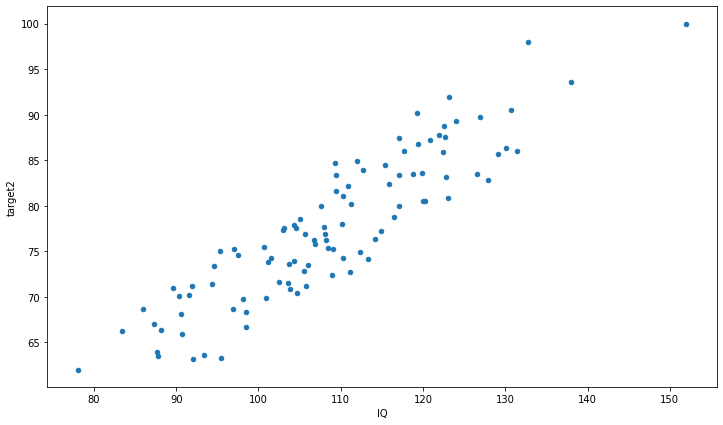

In [163]:
#  xlim=(0.0, 1.0), ylim=(1.8, -0.8), , alpha=plot_alpha   , s=2
df2.plot.scatter('IQ', 'target2', figsize=(12, 7))

### 체력

In [170]:
arr_체력 = dataset[:,3:4] # 행, 열
arr_체력[:4]

array([[-0.15740173],
       [ 1.67414589],
       [ 1.08489347],
       [-1.00941614]])

In [171]:
scaler = MinMaxScaler(feature_range=(50, 100))

In [172]:
scaler.fit(arr_iq)

MinMaxScaler(feature_range=(50, 100))

In [173]:
체력_f = scaler.transform(arr_체력)
체력_f[:5]

array([[68.93332736],
       [86.56976337],
       [80.8957025 ],
       [60.72906477],
       [68.03359166]])

In [181]:
df2['체력'] = 체력_f + np.random.randint(-13,13,size=(100,1))

<AxesSubplot:xlabel='체력', ylabel='target2'>

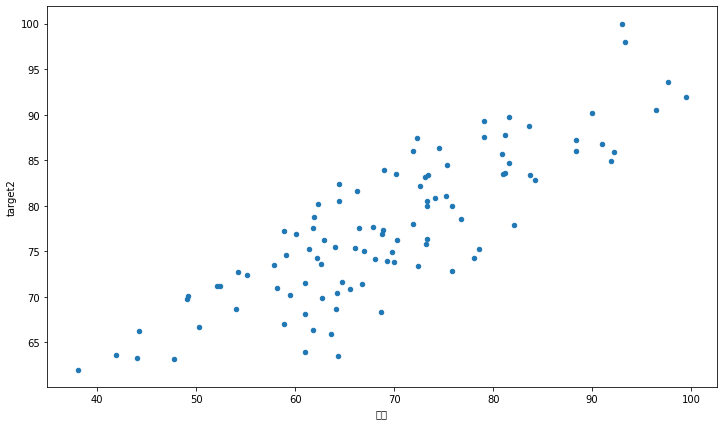

In [183]:
#  xlim=(0.0, 1.0), ylim=(1.8, -0.8), , alpha=plot_alpha   , s=2
df2.plot.scatter('체력', 'target2', figsize=(12, 7))

### Hair_Volume

In [199]:
# df2.head()

In [200]:
arr_Hair_Volume = dataset[:,2:3] # 행, 열
arr_Hair_Volume[:4]

array([[-0.3957493 ],
       [-0.21001153],
       [ 1.30502343],
       [-0.40054144]])

In [201]:
scaler = MinMaxScaler(feature_range=(1, 10))

In [202]:
scaler.fit(arr_Hair_Volume)

MinMaxScaler(feature_range=(1, 10))

In [203]:
Hair_Volume_f = scaler.transform(arr_Hair_Volume)
Hair_Volume_f[:5]

array([[4.73063437],
       [5.05646736],
       [7.71423785],
       [4.72222769],
       [3.6260803 ]])

In [204]:
df2['Hair_Volume'] = Hair_Volume_f # iq_f + np.random.randint(-10,10,size=(100,1))

In [206]:
# df2.head()

### 키

In [208]:
df2.head()

,col1,col2,col3,col4,target,target2,IQ,체력,Hair_Volume
0,0.090890,-0.834129,-0.395749,-0.157402,-7.327345,76.202743,106.719993,62.933327,4.730634
1,-0.058114,0.845277,-0.210012,1.674146,80.317248,89.743864,126.883716,81.569763,5.056467
2,0.698483,-0.646179,1.305023,1.084893,53.784497,85.644545,129.074843,80.895703,7.714238
3,0.037149,-0.454120,-0.400541,-1.009416,-48.348069,69.865026,100.874878,62.729065,4.722228
4,-0.183731,0.500764,-1.025389,-0.250839,-12.473097,75.407722,100.640310,64.033592,3.626080


In [209]:
arr_키 = dataset[:,3:4] # 행, 열
arr_키[:4]

array([[-0.15740173],
       [ 1.67414589],
       [ 1.08489347],
       [-1.00941614]])

In [210]:
scaler = MinMaxScaler(feature_range=(155, 190))

In [211]:
scaler.fit(arr_키)

MinMaxScaler(feature_range=(155, 190))

In [212]:
키_f = scaler.transform(arr_키)
키_f[:5]

array([[168.25332915],
       [180.59883436],
       [176.62699175],
       [162.51034534],
       [167.62351416]])

In [213]:
df2['키'] = 키_f # iq_f + np.random.randint(-10,10,size=(100,1))

In [214]:
# df2.head()

In [215]:
df2.head()

,col1,col2,col3,col4,target,target2,IQ,체력,Hair_Volume,키
0,0.090890,-0.834129,-0.395749,-0.157402,-7.327345,76.202743,106.719993,62.933327,4.730634,168.253329
1,-0.058114,0.845277,-0.210012,1.674146,80.317248,89.743864,126.883716,81.569763,5.056467,180.598834
2,0.698483,-0.646179,1.305023,1.084893,53.784497,85.644545,129.074843,80.895703,7.714238,176.626992
3,0.037149,-0.454120,-0.400541,-1.009416,-48.348069,69.865026,100.874878,62.729065,4.722228,162.510345
4,-0.183731,0.500764,-1.025389,-0.250839,-12.473097,75.407722,100.640310,64.033592,3.626080,167.623514


In [216]:
columns=['IQ','체력', 'Hair_Volume', '키','target2']
df3 = df2[columns].copy()
df3.head()

,IQ,체력,Hair_Volume,키,target2
0,106.719993,62.933327,4.730634,168.253329,76.202743
1,126.883716,81.569763,5.056467,180.598834,89.743864
2,129.074843,80.895703,7.714238,176.626992,85.644545
3,100.874878,62.729065,4.722228,162.510345,69.865026
4,100.640310,64.033592,3.626080,167.623514,75.407722


In [217]:
# df2.plot.scatter?

In [218]:
dataset = df3.values

In [219]:
X = dataset[:,0:4] # 행, 열
print(X[:5])
print("")
print('shape:', X.shape)
print('차원:', X.ndim)

[[106.71999283  62.93332736   4.73063437 168.25332915]
 [126.88371604  81.56976337   5.05646736 180.59883436]
 [129.074843    80.8957025    7.71423785 176.62699175]
 [100.87487773  62.72906477   4.72222769 162.51034534]
 [100.64030999  64.03359166   3.6260803  167.62351416]]

shape: (100, 4)
차원: 2


In [220]:
y = dataset[:,4] # 행, 열
y[:5]

array([76.20274252, 89.74386432, 85.64454452, 69.86502561, 75.40772182])

### 모델을 만들어 확인

In [221]:
X_train, y_train = X, y

In [222]:
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [223]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

In [224]:
y_predict = model_lr.predict(X_train) 
r2 = metrics.r2_score(y_train, y_predict)
print(r2) #1.0

0.9980932497622114


In [66]:
import numpy as np
df['Hair_Volume'] = np.random.randint(4,6,size=(100,1))

In [225]:
df3.to_excel('038_회귀_3.xlsx', index= False)